In [1]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv("retail_sales_dataset.csv")
df['Date'] = pd.to_datetime(df['Date'])

df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
print("\nFirst 5 rows:")


First 5 rows:


In [4]:
print(df.head())

   Transaction ID       Date Customer ID  Gender  Age Product Category  \
0               1 2023-11-24     CUST001    Male   34           Beauty   
1               2 2023-02-27     CUST002  Female   26         Clothing   
2               3 2023-01-13     CUST003    Male   50      Electronics   
3               4 2023-05-21     CUST004    Male   37         Clothing   
4               5 2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [5]:
print("\nMissing values:")


Missing values:


In [6]:
print(df.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [7]:
print("\nDate range:", df['Date'].min(), "to", df['Date'].max())


Date range: 2023-01-01 00:00:00 to 2024-01-01 00:00:00


In [8]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

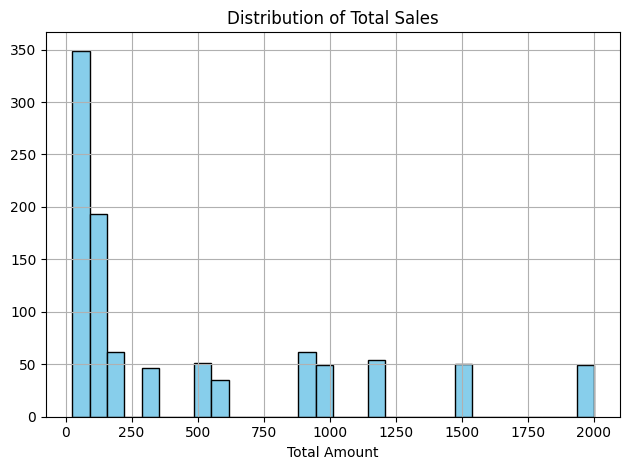

In [9]:
plt.subplot(1, 1, 1)
df['Total Amount'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Sales')
plt.xlabel('Total Amount')
plt.tight_layout()
plt.show()

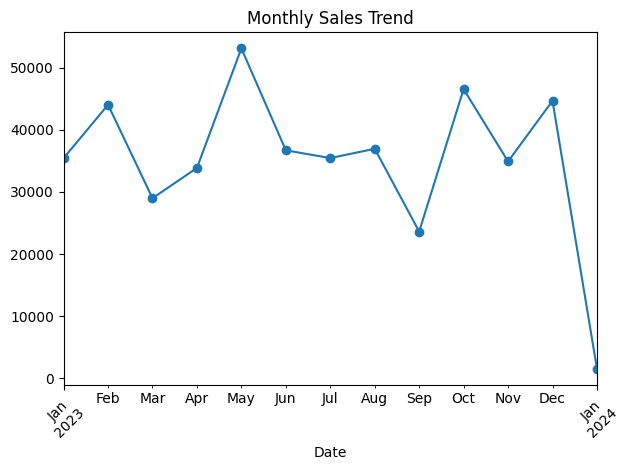

In [10]:
plt.subplot(1, 1, 1)
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Total Amount'].sum()
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

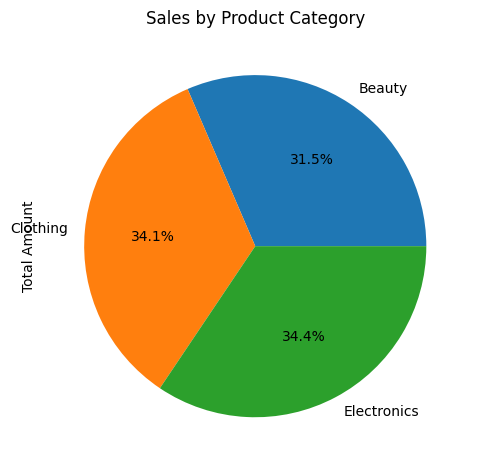

In [11]:
plt.subplot(1, 1, 1)
category_sales = df.groupby('Product Category')['Total Amount'].sum()
category_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales by Product Category')
plt.tight_layout()
plt.show()

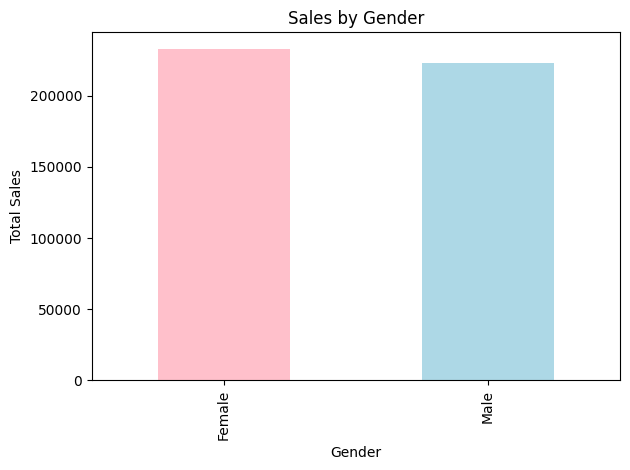

In [12]:
plt.subplot(1, 1, 1)
gender_sales = df.groupby('Gender')['Total Amount'].sum()
gender_sales.plot(kind='bar', color=['pink', 'lightblue'])
plt.title('Sales by Gender')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

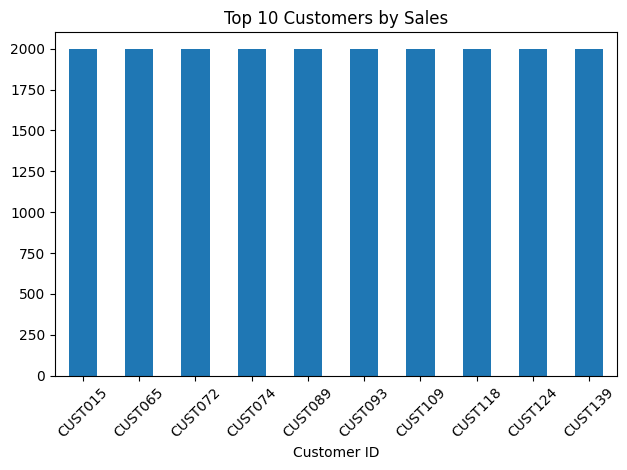

In [13]:
plt.subplot(1, 1, 1)
top_cust = df.groupby('Customer ID')['Total Amount'].sum().nlargest(10)
top_cust.plot(kind='bar')
plt.title('Top 10 Customers by Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
print("=== RETAIL SALES INSIGHTS === [file:82]")
print("\n1. Total Revenue:", df['Total Amount'].sum())
print("2. Average Order Value:", df['Total Amount'].mean().round(2))
print("3. Total Transactions:", len(df))
print("4. Unique Customers:", df['Customer ID'].nunique())

=== RETAIL SALES INSIGHTS === [file:82]

1. Total Revenue: 456000
2. Average Order Value: 456.0
3. Total Transactions: 1000
4. Unique Customers: 1000


In [15]:
print("\nCategory wise revenue:")
cat_rev = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print(cat_rev)


Category wise revenue:
Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


In [16]:
print("\nGender wise revenue:")
gender_rev = df.groupby('Gender')['Total Amount'].sum()
print(gender_rev)


Gender wise revenue:
Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


In [17]:
print("\nAge group analysis:")
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 50, 65, 100], labels=['18-25', '26-35', '36-50', '51-65', '65+'])
age_sales = df.groupby('Age_Group')['Total Amount'].sum()
print(age_sales)


Age group analysis:
Age_Group
18-25     84550
26-35     98480
36-50    139660
51-65    133310
65+           0
Name: Total Amount, dtype: int64


C:\Users\admin\AppData\Local\Temp\ipykernel_3292\4183148031.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sales = df.groupby('Age_Group')['Total Amount'].sum()


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
df['Month'] = df['Date'].dt.to_period('M').astype(int)
monthly_data = df.groupby('Month')['Total Amount'].sum().reset_index()
monthly_data['Month_num'] = monthly_data['Month'] - monthly_data['Month'].min()

In [19]:
X = monthly_data['Month_num'].values.reshape(-1, 1)
y = monthly_data['Total Amount'].values

In [20]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [21]:
future_months = np.array([len(monthly_data), len(monthly_data)+1, len(monthly_data)+2]).reshape(-1, 1)
predictions = model.predict(future_months)

In [22]:
print("=== FORECASTING RESULTS ===")
print("Next 3 months predicted sales:")
for i, pred in enumerate(predictions, 1):
    print(f"Month {i}: ₹{pred:.0f}")

=== FORECASTING RESULTS ===
Next 3 months predicted sales:
Month 1: ₹27487
Month 2: ₹26403
Month 3: ₹25319


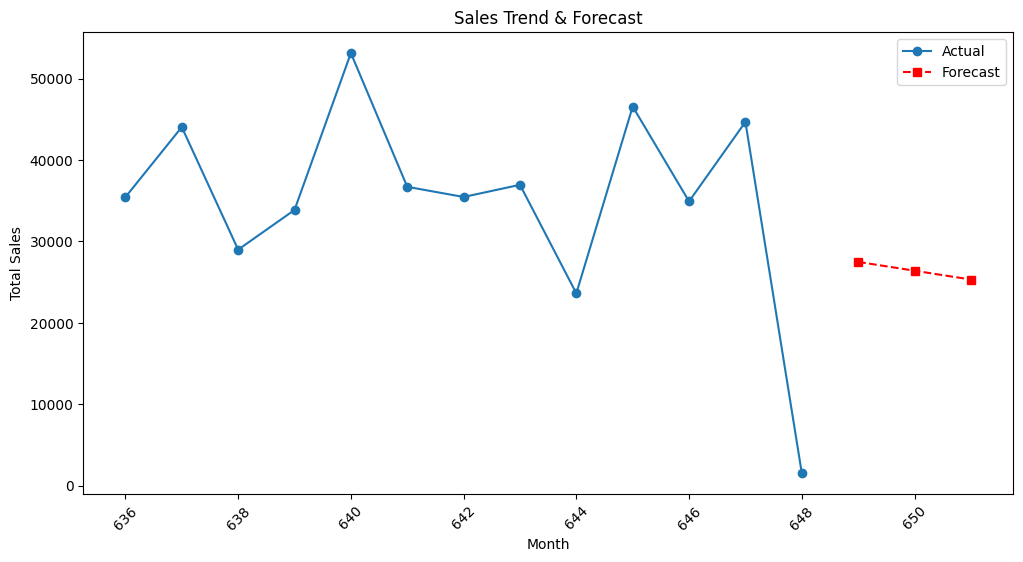

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Month'], monthly_data['Total Amount'], 'o-', label='Actual')
plt.plot(future_months.flatten() + monthly_data['Month'].min(), predictions, 'r--', marker='s', label='Forecast')
plt.title('Sales Trend & Forecast')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.xticks(rotation=45)
plt.show()